# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [46]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#Mean of sales for the week
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean_sales = sum(sales)/len(sales)
print('Mean sales:', mean_sales)

Mean sales: 3052.714285714286


In [48]:
#Variance. It is best to use a function but we can use lambda for elagancy and speed
def sub_mean(number):
    return number-mean_sales
lambda x: x-mean_sales

<function __main__.<lambda>(x)>

In [49]:
# Map the function to the list
variance = list(map(sub_mean, sales))

In [50]:
# Square the list then sum 
squared = list(map(lambda x: x**2, variance))

In [51]:
# Now we need to determine the length of our lists, the sample and entire population
list_length=len(squared)-1
list_length=len(squared)

In [52]:
# Now we are able to calculate the difference in the sample pop., 
#and the entire population and calculate the variance.
variance_widgets = sum(squared)/list_length
print('{:.2f}'.format(variance_widgets,3))

183761.06


In [53]:
#Standard deviation
print(math.sqrt(variance_widgets))

428.67360686714756


In [54]:
#Checking work with numpy
print('{:.2f}'.format(np.mean(sales)))
print('{:.2f}'.format(np.var(sales)))
print('{:.2f}'.format(np.std(sales)))

3052.71
183761.06
428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [55]:
customers = [127, 80, 105, 92, 120, 115, 93]
print('{:.2f}'.format(np.cov(customers, sales)[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [56]:
# Standard deviation of customers who entered the store last week.
customers = [127, 80, 105, 92, 120, 115, 93]
print('{:.2f}'.format(np.std(customers)))

15.79


In [57]:
# Covariance with numpy.
print('{:.2f}'.format(np.cov(sales, customers)[0][1]))

7604.36


In [58]:
# Use numpy to determine both standard deviations from the population of the two lists.
print('Standard Deviation sales:','{:.2f}'.format(np.std(sales)))
print('Standard Deviation customers:','{:.2f}'.format(np.std(customers)))

Standard Deviation sales: 428.67
Standard Deviation customers: 15.79


In [59]:
# Or we could use pandas instead and display our dataframe.
df = pd.DataFrame({'Sales':sales, 'Customers':customers})

In [60]:
# Get standard deviation for a sample using pandas.
std_sales = df['Sales'].std(ddof=1)
std_customers = df['Customers'].std(ddof=1)
print('{:.4f}'.format(std_sales))
print('{:.4f}'.format(std_customers))

463.0204
17.0573


In [61]:
# Determine the covariance of the two lists using pandas.
sales_cust_cov= df['Sales'].cov(df['Customers'])
print('{:.4f}'.format(sales_cust_cov))

7604.3571


In [62]:
# We need to first calculate the denominator. 
d_nom = std_sales*std_customers
d_nom


7897.890309308459

In [63]:
# Determine the correalation coefficient.
cc_sales_cust = sales_cust_cov/d_nom
print('{:.6f}'.format(cc_sales_cust))

0.962834


In [64]:
# Check with pandas.
print('{:.6f}'.format(df['Sales'].corr(df['Customers'])))

0.962834


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [65]:
#Load titanic dataset using pandas.
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [66]:
# Dataframe of the covariance matrix. 
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [67]:
#Correalation matrix.
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

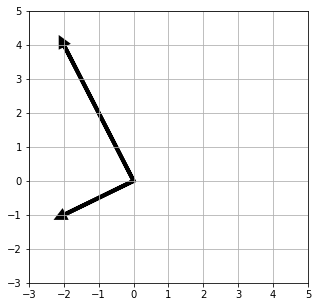

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

v=[-2, 4]
w=[-2,-1]

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.arrow(0,0, v[0], v[1], 
            head_width=.2, 
            head_length=0.2, 
            linewidth=4)
plt.arrow(0,0, w[0], w[1], 
            head_width=.2, 
            head_length=0.2, 
            linewidth=4)

plt.show()

In [69]:
# Check to see if dot product returns 0, a necessary requirement to determine orthogonality
# As we can see the value are equivalent to zero
# A synonym for orthogonal is parrallel. 
v=[-2, 4]
w=[-2,-1]
np.dot(v, w)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [70]:
#No the dot product of the two vectors does not equal to 0 
a = [-5, 3, 7]
b = [6,-8, 2]

np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [71]:
c = np.array([2, -15, 6, 20])

In [72]:
# The norm of c squared.
c1 = np.linalg.norm(c)
c1

25.787593916455254

In [73]:
#c*c is the dot product
np.dot(c,c)

665

In [74]:
#cTc is the transpose with the inverse returning the original value
c2 = print(c1**2)
c2

665.0


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
f = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [75]:
#Create an array out of f
f = np.array([4, 12, 11, 9, 2])
f

array([ 4, 12, 11,  9,  2])

In [76]:
#Want to find out how long the vector is by first finding the norm
norm_f = np.linalg.norm(f)
norm_f

19.131126469708992

In [77]:
#Take the initial array over the norm to get a new vector
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [78]:
#The new vector's length or norm is extremely close to 1.0, which is where we 
#want it in order to more easily compare vectors
f_hat_norm = np.linalg.norm(f_hat)
f_hat_norm

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

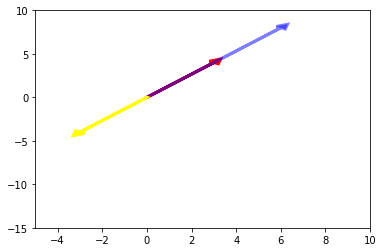

In [79]:
#Plotting the linearly dependent vectors
plt.xlim(-5,10)
plt.ylim(-15,10)

v = [3,4]
v1 = [2,1]
v2 = np.multiply(2,v)
v3 = np.multiply(-1,v)

ax.grid()
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.arrow(0,0,v[0],v[1], head_width=.50, head_length=.50, linewidth=3, color='red',)
plt.arrow(0,0,v2[0],v2[1], head_width=.50, head_length=.50, linewidth=3, color='blue', alpha=0.5)
plt.arrow(0,0,v3[0],v3[1], head_width=.50, head_length=.50, linewidth=3, color='yellow');


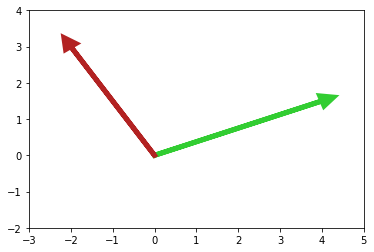

In [80]:
#Linear independent
plt.xlim(-3,5)          
plt.ylim(-2,4)

v = [4,1.5] 
v1 = [-2,3]

plt.arrow(0,0, v[0], v[1], linewidth=5, head_width=.3, head_length=0.3, color ='limegreen')
plt.arrow(0,0, v1[0], v1[1], linewidth=5, head_width=.3, head_length=0.3, color ='firebrick');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [81]:
#Create two vectors
g = np.array([1,2])
h = np.array([4,8])
print(g,'\n', h)

[1 2] 
 [4 8]


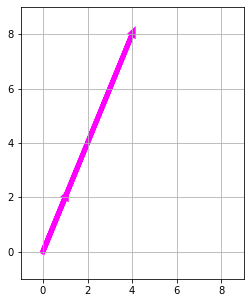

In [82]:
#The span of the two vectors are linearly dependent
fig, ax = plt.subplots(figsize=(4,5))
ax.grid()
plt.xlim(-1,9)          
plt.ylim(-1,9)

#For more pythonic code use a function
for vect in [g, h]:
    plt.arrow(0,0,
              vect[0], 
              vect[1], 
              head_width=.10, 
              head_length=.10, 
              linewidth=5, 
              color='fuchsia');

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [83]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
print(l,'\n', m, '\n',n)

[1 2 3] 
 [-1  0  7] 
 [4 8 2]


The span is linearly indepedent

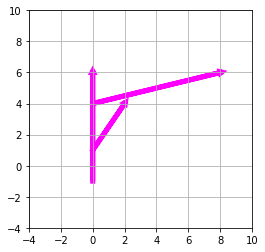

In [84]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,10)          
plt.ylim(-4,10)

for vect in [l, m, n]:
    plt.arrow(0,vect[0],
              vect[1], 
              vect[2], 
              head_width=.10, 
              head_length=.10, 
              linewidth=5, 
              color='fuchsia')

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



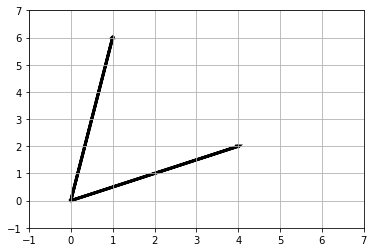

In [85]:
#R**2 stands for two-dimensional space

vector_1 = [4,2,2]
vector_2 = [1,6,2]

fig,ax = plt.subplots()
ax.grid()
plt.xlim(-1,7)
plt.ylim(-1,7)
plt.arrow(0,0,vector_1[0], vector_1[1], head_width=.02, head_length=.02, linewidth=3)
plt.arrow(0,0,vector_2[0], vector_2[1], head_width=.02, head_length=.02, linewidth=3);

## 6.2 What does it mean to form a basis?

Basis is the starting, 0,1; 1,0 point for vectors in dimensional space such as R: 1; R^2: 0,1, - 1,0; R^3: 1,0,0 - 0,1,0 - 0,0,1.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [86]:
# The rank of matrix is the dimension of the vector space spanned by its columns.
# Will use Gaussian Elimination method to determine the rank of a matrix and 
# get it in row-echelon form.
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [87]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Since the rank of the matrix is 3, then it is able to span the entire three dimensions of the original matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.